<a href="https://colab.research.google.com/github/Hands-On-Fraud-Analytics/Chapter-12-Data-Preparation-for-Fraud-Analytics/blob/main/Chapter_12_Data_Preparation_for_Fraud_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Project: Human Recourses Analysis**

**Objectives:**

1. Perform statistical analysis on real world datasets.
2. Deal with missing data using pandas
3. Perform one-hot encoding
4. Perform scaling including normalization and Standardization
5. Perform Pandas operations and filtering
6. Calculate and display correlation matrix & heatmaps

# **Task #1: Import Dataset and Perform Basic Statistical Data Analysis**

In [ ]:
# Import Pandas Library
import pandas as pd

In [ ]:
# Force Pandas to display all rows and columns
pd.set_option('max_columns', None)
pd.set_option('display.max_rows', None)

#These two lines of code force Pandas to display all rows and columns of the dataset when we print it later on.
#This is useful for exploring the data and getting a sense of what it contains.

In [ ]:
# Let's read a CSV file using Pandas as follows
hr_df = pd.read_csv('Human_Resources.csv')
hr_df

#These lines of code read in a CSV file called "Human_Resources.csv" and store it in a Pandas DataFrame called "hr_df".
#The DataFrame is then printed to the console so we can see what it looks like.

,Age,MonthlyIncome,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,5993.0,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,49,NaN,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,37,2090.0,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,33,2909.0,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,27,3468.0,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,2571.0,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,...,3,80,1,17,3,3,5,2,0,3
1466,39,9991.0,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,...,1,80,1,9,5,3,7,7,1,7
1467,27,6142.0,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,...,2,80,1,6,0,3,6,2,0,3
1468,49,5390.0,No,Travel_Frequently,1023,Sales,2,3,Medical,1,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
# Let's obtain the datatype
type(hr_df)

#This line of code prints the datatype of the hr_df DataFrame, which should be "pandas.core.frame.DataFrame".

pandas.core.frame.DataFrame

In [ ]:
# you can view the first couple of rows using .head()
hr_df.head(6)

#This line of code prints the first 6 rows of the hr_df DataFrame using the .head() method.
#This is useful for getting a quick glimpse of what the data looks like.

,Age,MonthlyIncome,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,5993.0,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,49,NaN,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,37,2090.0,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,33,2909.0,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,27,3468.0,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
5,32,3068.0,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,...,3,80,0,8,2,2,7,7,3,6


In [ ]:
# you can view the last couple of rows using .tail()
hr_df.tail(4)

#This line of code prints the last 4 rows of the hr_df DataFrame using the .tail() method. This is also useful for getting a quick glimpse of what the data looks like.

,Age,MonthlyIncome,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1466,39,9991.0,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,...,1,80,1,9,5,3,7,7,1,7
1467,27,6142.0,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,...,2,80,1,6,0,3,6,2,0,3
1468,49,5390.0,No,Travel_Frequently,1023,Sales,2,3,Medical,1,...,4,80,0,17,3,2,9,6,0,8
1469,34,4404.0,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,...,1,80,0,6,3,4,4,3,1,2


In [ ]:
# Calculate the average values for employee_df dataframe
hr_df.mean()

#This line of code calculates the mean (average) value for each column of the hr_df DataFrame.
#This is useful for getting a sense of the central tendency of the data.

<ipython-input-6-cde0d1940117>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  hr_df.mean()


Age                            36.923810
MonthlyIncome                6505.155419
DailyRate                     802.485714
DistanceFromHome                9.192517
Education                       2.912925
EmployeeCount                   1.000000
EmployeeNumber               1025.556161
EnvironmentSatisfaction         2.721769
HourlyRate                     65.891156
JobInvolvement                  2.729932
JobLevel                        2.063946
JobSatisfaction                 2.728571
MonthlyRate                 14310.966621
NumCompaniesWorked              2.693197
PercentSalaryHike              15.206263
PerformanceRating               3.153165
RelationshipSatisfaction        2.712245
StandardHours                  80.000000
StockOptionLevel                0.793878
TotalWorkingYears              11.279592
TrainingTimesLastYear           2.799320
WorkLifeBalance                 2.761224
YearsAtCompany                  7.008163
YearsInCurrentRole              4.229252
YearsSinceLastPr

In [ ]:
# 35 features in total
hr_df.info()

#This line of code prints information about the hr_df DataFrame, including the number of rows, the number of columns, and the data types of each column.
#This is useful for getting a sense of the structure of the data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   MonthlyIncome             1467 non-null   float64
 2   Attrition                 1470 non-null   object 
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1469 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1469 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EmployeeNumber            1469 non-null   float64
 11  EnvironmentSatisfaction   1470 non-null   int64  
 12  Gender                    1469 non-null   object 
 13  HourlyRate                1470 non-null   int64  
 14  JobInvol

In [ ]:
# Obtain a Statistical Summary about the data
hr_df.describe()

#This line of code generates a statistical summary of the hr_df DataFrame, including measures of central tendency, dispersion, and shape.
#This is useful for getting a more detailed understanding of the distribution of the data.

,Age,MonthlyIncome,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1467.000000,1470.000000,1470.000000,1470.000000,1470.0,1469.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,6505.155419,802.485714,9.192517,2.912925,1.0,1025.556161,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,4711.297846,403.509100,8.106864,1.024165,0.0,601.646166,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,1009.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2911.000000,465.000000,2.000000,2.000000,1.0,492.000000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,4908.000000,802.000000,7.000000,3.000000,1.0,1022.000000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,8378.000000,1157.000000,14.000000,4.000000,1.0,1556.000000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,19999.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# **Task #2: Dealing With Missing Data**

In [ ]:
hr_df

#Display hr_df.

,Age,MonthlyIncome,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,5993.0,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,49,NaN,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,37,2090.0,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,33,2909.0,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,27,3468.0,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,2571.0,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,...,3,80,1,17,3,3,5,2,0,3
1466,39,9991.0,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,...,1,80,1,9,5,3,7,7,1,7
1467,27,6142.0,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,...,2,80,1,6,0,3,6,2,0,3
1468,49,5390.0,No,Travel_Frequently,1023,Sales,2,3,Medical,1,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
# Let's locate rows that have Null values
# Notice Row index 6 has many missing values
hr_df.isnull()

#Then, we can use isnull() function to locate rows that have null values in the dataset.
#This function returns a Boolean DataFrame where True indicates that the corresponding element is null, and False indicates that the element has a value.

,Age,MonthlyIncome,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1468,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Let's see the total number of missing elements per column
hr_df.isnull().sum()

#Next, use isnull().sum() function to calculate the total number of missing elements per column.
#This function returns a Series object where the column names represent the variables in the dataset, and the values represent the number of missing values for each variable.

Age                         0
MonthlyIncome               3
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  1
DistanceFromHome            0
Education                   0
EducationField              1
EmployeeCount               0
EmployeeNumber              1
EnvironmentSatisfaction     0
Gender                      1
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     1
JobSatisfaction             0
MaritalStatus               1
MonthlyRate                 2
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           1
PerformanceRating           1
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
# Drop any row that contains a Null value
# Note that the size of the dataframe has been reduced by 7 elements from 1470 to 1463
hr_df.dropna(how = 'any', inplace = True)

#The fifth step is to drop any row that contains at least one null value using the dropna() method with the how parameter set to 'any', which means that a row will be dropped
#if it contains at least one null value.
#The inplace parameter is set to True, which means that the original dataframe will be modified instead of creating a new one.

In [ ]:
# Notice that row 1 for example is no longer existing!
hr_df

#The sixth step is to verify that the missing values have been dropped by printing the hr_df dataframe.

,Age,MonthlyIncome,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,5993.0,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
2,37,2090.0,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,33,2909.0,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,27,3468.0,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
5,32,3068.0,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,...,3,80,0,8,2,2,7,7,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,2571.0,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,...,3,80,1,17,3,3,5,2,0,3
1466,39,9991.0,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,...,1,80,1,9,5,3,7,7,1,7
1467,27,6142.0,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,...,2,80,1,6,0,3,6,2,0,3
1468,49,5390.0,No,Travel_Frequently,1023,Sales,2,3,Medical,1,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
# Let's check if we still have any missing values
hr_df.isnull().sum()

#The seventh step is to check if there are still any missing values left in the dataset using the isnull().sum() method.

Age                         0
MonthlyIncome               0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

**[Caution icon]**

Dropping missing values may result in a loss of important data. A smarter approach is to impute the missing values with reasonable estimates based on the available data. One way to do this is to use the mean of the available values for the variable.

**[end caution]**

In [ ]:
# Let's explore an alternative (smarter) method to deal with missing values
# Let's read the raw data again using Pandas as follows
hr_df = pd.read_csv('Human_Resources.csv')
hr_df

#The eighth step is to calculate the average monthly income using the mean() method of Pandas and passing the 'MonthlyIncome' column as an argument.

,Age,MonthlyIncome,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,5993.0,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,49,NaN,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,37,2090.0,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,33,2909.0,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,27,3468.0,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,2571.0,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,...,3,80,1,17,3,3,5,2,0,3
1466,39,9991.0,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,...,1,80,1,9,5,3,7,7,1,7
1467,27,6142.0,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,...,2,80,1,6,0,3,6,2,0,3
1468,49,5390.0,No,Travel_Frequently,1023,Sales,2,3,Medical,1,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
# Calculate the average monthly income
hr_df['MonthlyIncome'].mean()

# You can use Fillna to fill a given column with a certain value
hr_df["MonthlyIncome"].fillna(hr_df['MonthlyIncome'].mean(), inplace = True)


#The ninth step is to fill in the missing values in the 'MonthlyIncome' column with the mean monthly income using the fillna() method of Pandas
#with the inplace parameter set to True to modify the original dataframe.

In [ ]:
hr_df

#The final step is to print the modified hr_df dataframe to verify that the missing values have been filled in with the mean monthly income.
#It can be seen that in raw “1” under “MonthlyIncome” column is now filled in by mean monthly income.

,Age,MonthlyIncome,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,5993.000000,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,49,6505.155419,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,37,2090.000000,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,33,2909.000000,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,27,3468.000000,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,2571.000000,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,...,3,80,1,17,3,3,5,2,0,3
1466,39,9991.000000,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,...,1,80,1,9,5,3,7,7,1,7
1467,27,6142.000000,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,...,2,80,1,6,0,3,6,2,0,3
1468,49,5390.000000,No,Travel_Frequently,1023,Sales,2,3,Medical,1,...,4,80,0,17,3,2,9,6,0,8


# **PRACTICE OPPORTUNITY [OPTIONAL]:**

Calculate the median monthly rate. Use the calculated median values to fill out missing data. Confirm that the process is successful

# **Task #3: Perform One-Hot Encoding**

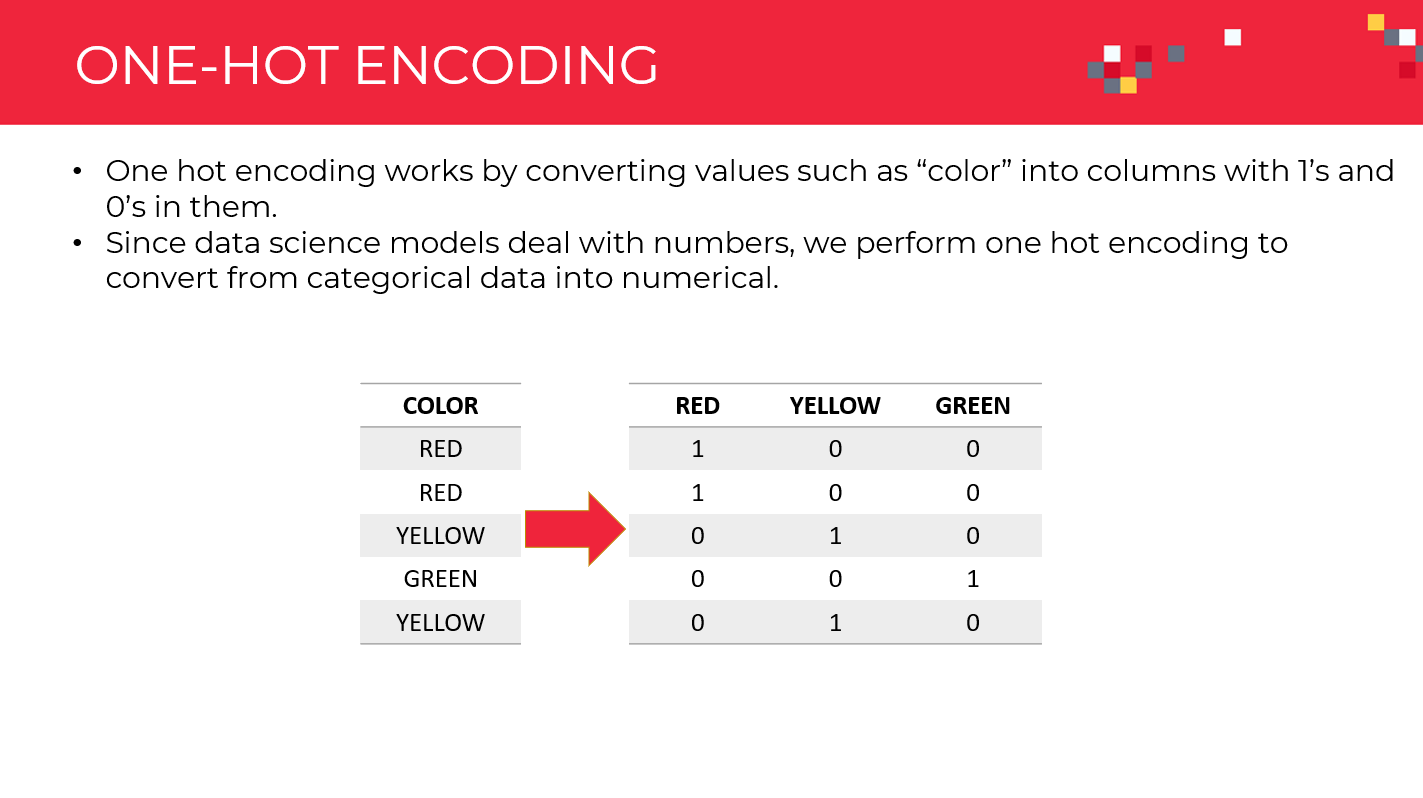

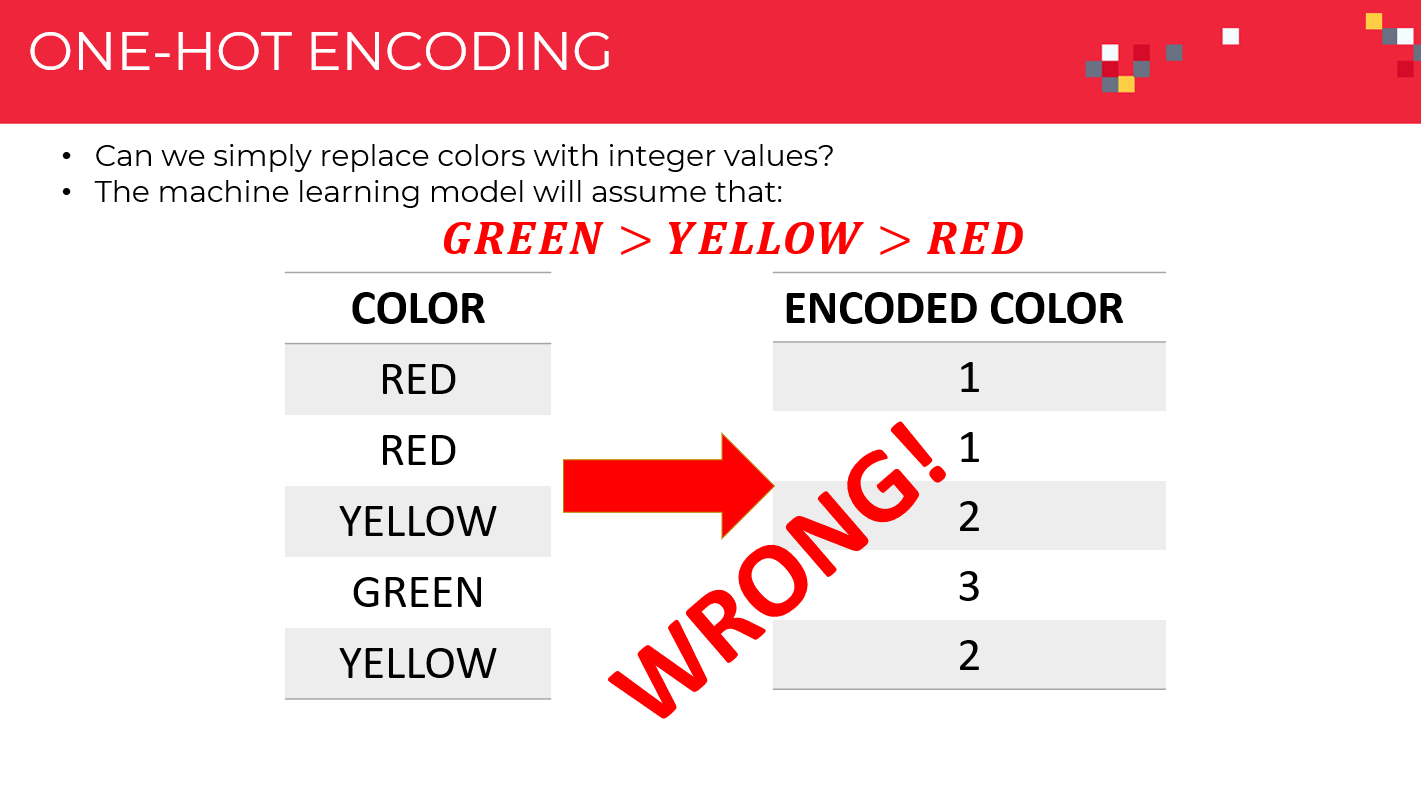

In [ ]:
# Let's read a CSV file using Pandas as follows
hr_df = pd.read_csv('Human_Resources.csv')
hr_df

In [ ]:
hr_df['BusinessTravel'].unique()

#Display the unique values of the "BusinessTravel" column using the following command

In [ ]:
hr_df['BusinessTravel']

#Display the values of the "BusinessTravel" column using the following command

In [ ]:
BusinessTravel_Encoded = pd.get_dummies(hr_df['BusinessTravel'])
print(BusinessTravel_Encoded)

#Use one-hot encoding to convert the "BusinessTravel" column into a series of binary columns using the following command

This command creates a new dataframe called "BusinessTravel_Encoded" that contains binary columns for each unique value in the "BusinessTravel" column. For example, if the original "BusinessTravel" column contained three unique values ("Travel_Rarely", "Travel_Frequently", and "Non-Travel"), then the "BusinessTravel_Encoded" dataframe would contain three binary columns: "BusinessTravel_Travel_Rarely", "BusinessTravel_Travel_Frequently", and "BusinessTravel_Non-Travel".
The last line command will displays the contents of the "BusinessTravel_Encoded" dataframe in the console.


**PRACTICE OPPORTUNITY [OPTIONAL]:**
- **Import the Human Resources data and remove all missing values**
- **How many unique categories exist in the Education Field column?**
- **Perform one hot encoding to the Education Field column**

# **Task #4: Perform Scaling (Normalization & Standardization)**

In [ ]:
# Let's read a CSV file using Pandas as follows
hr_df = pd.read_csv('Human_Resources.csv')
hr_df

In [ ]:
hr_df['Age'].values

#This code retrieves the values of the 'Age' column from the hr_df DataFrame using the .values attribute.
#This will return an array of the 'Age' values, which we can use for feature scaling.

In [ ]:
# Normalization is conducted to make feature values range from 0 to 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
hr_df['Age'] = scaler.fit_transform(hr_df['Age'].values.reshape(-1,1))

In this block of code, we first import the MinMaxScaler class from the sklearn.preprocessing module.
We then create an instance of the MinMaxScaler class and assign it to a variable called scaler.
Next, we use the fit_transform() method of the scaler object to perform Min-Max scaling on the 'Age' column of the hr_df DataFrame.
The fit_transform() method takes the values of the 'Age' column as input, reshaped as a 2D array using the .reshape(-1,1) method, and returns an array of the scaled values.
Finally, we replace the original 'Age' column in the hr_df DataFrame with the scaled values.


In [ ]:
hr_df['Age']

#This code retrieves the 'Age' column from the hr_df DataFrame after it has been Min-Max scaled.
#The resulting column contains the scaled 'Age' values, ranging from 0 to 1.

In [ ]:
hr_df.describe()

#This code prints out summary statistics of the hr_df DataFrame using the describe() method.
#The output shows the count, mean, standard deviation, minimum value, 25th percentile, median, 75th percentile, and maximum value for each numerical column in the DataFrame, including the Min-Max scaled 'Age' column.


**Practice Opportunity: [OPTIONAL]**

- **Perform feature scaling by performing standardization (Recall that Standardization is conducted to transform the data to have a mean of zero and standard deviation of 1.**

- **Perform a sanity check to ensure that the transformation was successful**


# **Task #5. Pandas Operations/Filtering**

In [ ]:
hr_df

In [ ]:
# Pick certain rows that satisfy a certain criterion
loyal_employees_df = hr_df[hr_df['YearsAtCompany'] >= 30]

#Then, a subset of the employees who have worked at the company for 30 or more years is selected and stored in a new dataframe called loyal_employees_df

In [ ]:
# Pick certain rows that satisfy 2 or more criteria
mask_1 = hr_df['YearsAtCompany'] >= 30
mask_2 = hr_df['Department'] == 'Research & Development'
loyal_rnd_df = hr_df[mask_1 & mask_2]


Another subset of employees from the Research & Development department who have been with the organisation for 30 years or more is chosen and put in a new dataframe named loyal_rnd_df. This is accomplished by first constructing two boolean masks, mask_1 and mask_2, and then combining them with the & operator to pick just the rows that satisfy both masks:

In [ ]:
# Values that fall between a given range
subset_df = hr_df[(hr_df['DailyRate'] >= 800) & (hr_df['DailyRate'] <= 850)]
print(subset_df)

#Finally, a subset of employees with DailyRate values between 800 and 850 is selected and displayed

# **Task #6: Perform Basic EDA on Both Classes**

In [ ]:
hr_df

In [ ]:
hr_df.info()

#Calls the info() method on the "hr_df" dataframe to display information about the dataframe, such as its columns, data types, and number of non-null values.

In [ ]:
# It makes sense to drop 'EmployeeCount', 'Standardhours' and 'Over18' since they do not change from one employee to the other
# Let's drop 'EmployeeNumber' as well
hr_df.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis=1, inplace=True)

#Drops some columns that are not needed for the analysis.
#These columns are "EmployeeCount", "StandardHours", "Over18", and "EmployeeNumber".
#The drop() method is used to remove these columns from the dataframe.
#The "axis=1" argument specifies that columns should be dropped, and "inplace=True" specifies that the changes should be made in place on the dataframe.


In [ ]:
hr_df.info()

#The code again calls the info() method on the updated "hr_df" dataframe to display the updated information, which now shows that the unnecessary columns have been removed.

In [ ]:
# Let's see how many employees left the company!
left_df = hr_df[hr_df['Attrition'] == 'Yes']

#The code creates a new dataframe called "left_df" that contains only the rows where the "Attrition" column is equal to "Yes".
#This filters the "hr_df" dataframe to only include employees who left the company.

In [ ]:
# View employees who left
print(left_df)

#The code displays the list of employees who left the company using the print() function.

In [ ]:
left_df.describe()

#The code displays summary statistics of the numerical columns in the "left_df" dataframe using the describe() method.

**PRACTICE OPPORTUNITY [OPTIONAL]:**

- **Filter the hr_df to only include the employees who stayed in the company**
- **Generate statistical summary for employees who stayed**
- **Compare both statistical summaries. What do you infer from the data?**

# **Task #7: Histogram and Correlation**

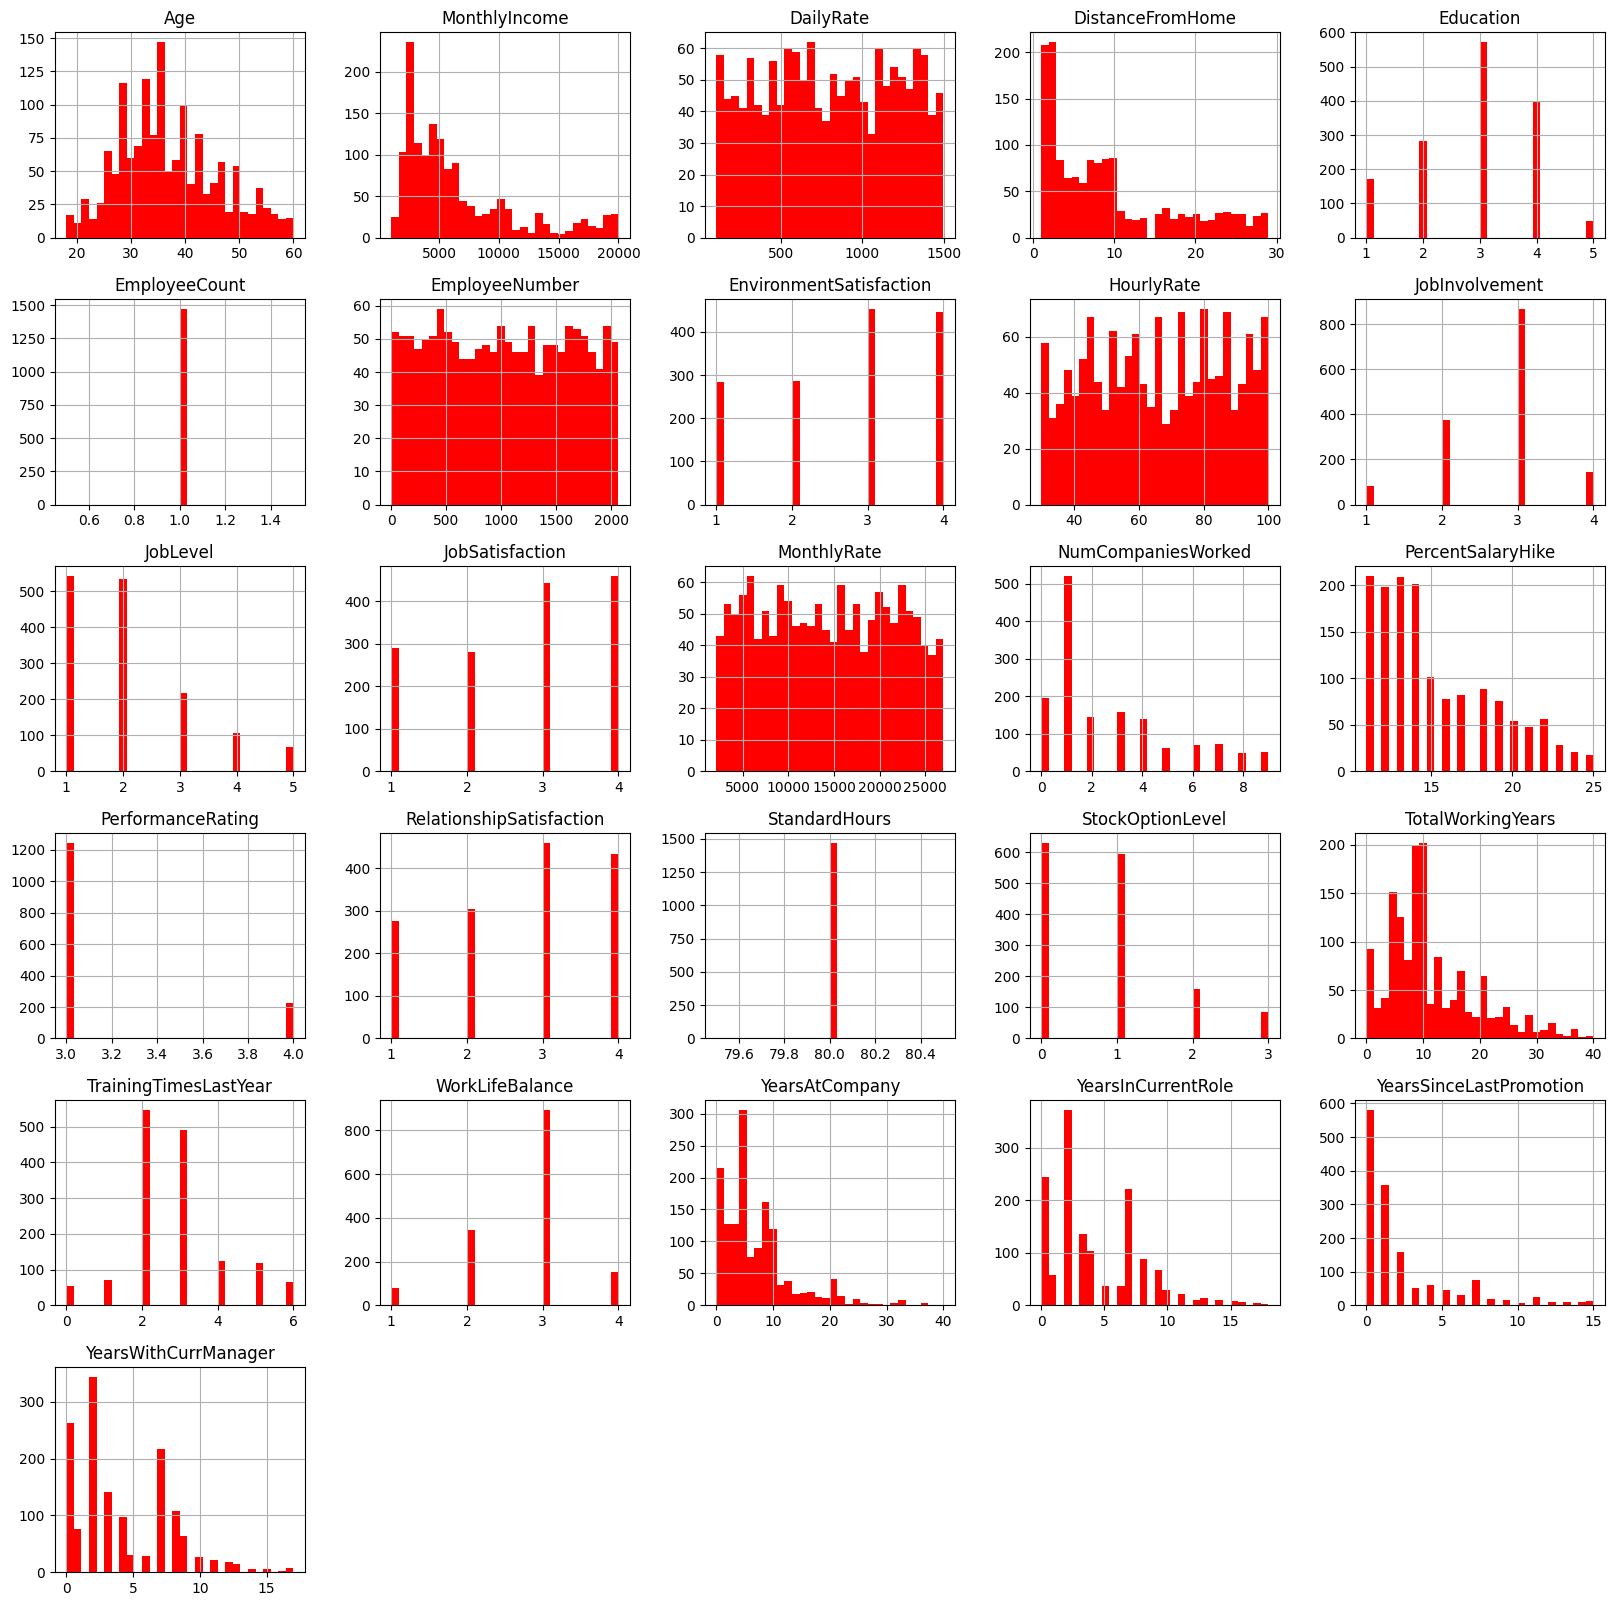

In [ ]:
import matplotlib.pyplot as plt

hr_df.hist(bins=30, figsize=(20, 20), color='r')
plt.show()

# Several features such as 'MonthlyIncome' and 'TotalWorkingYears' are tail heavy

This method creates a histogram for each numerical column in the dataframe. The bins parameter specifies the number of bins to use in each histogram, while the figsize parameter determines the size of the resulting figure. The color parameter sets the color of the histograms to red.
The resulting histogram shows the distribution of each numerical column in the dataframe. For example, if the MonthlyIncome column has a long tail to the right, it means that there are a few employees with very high incomes.

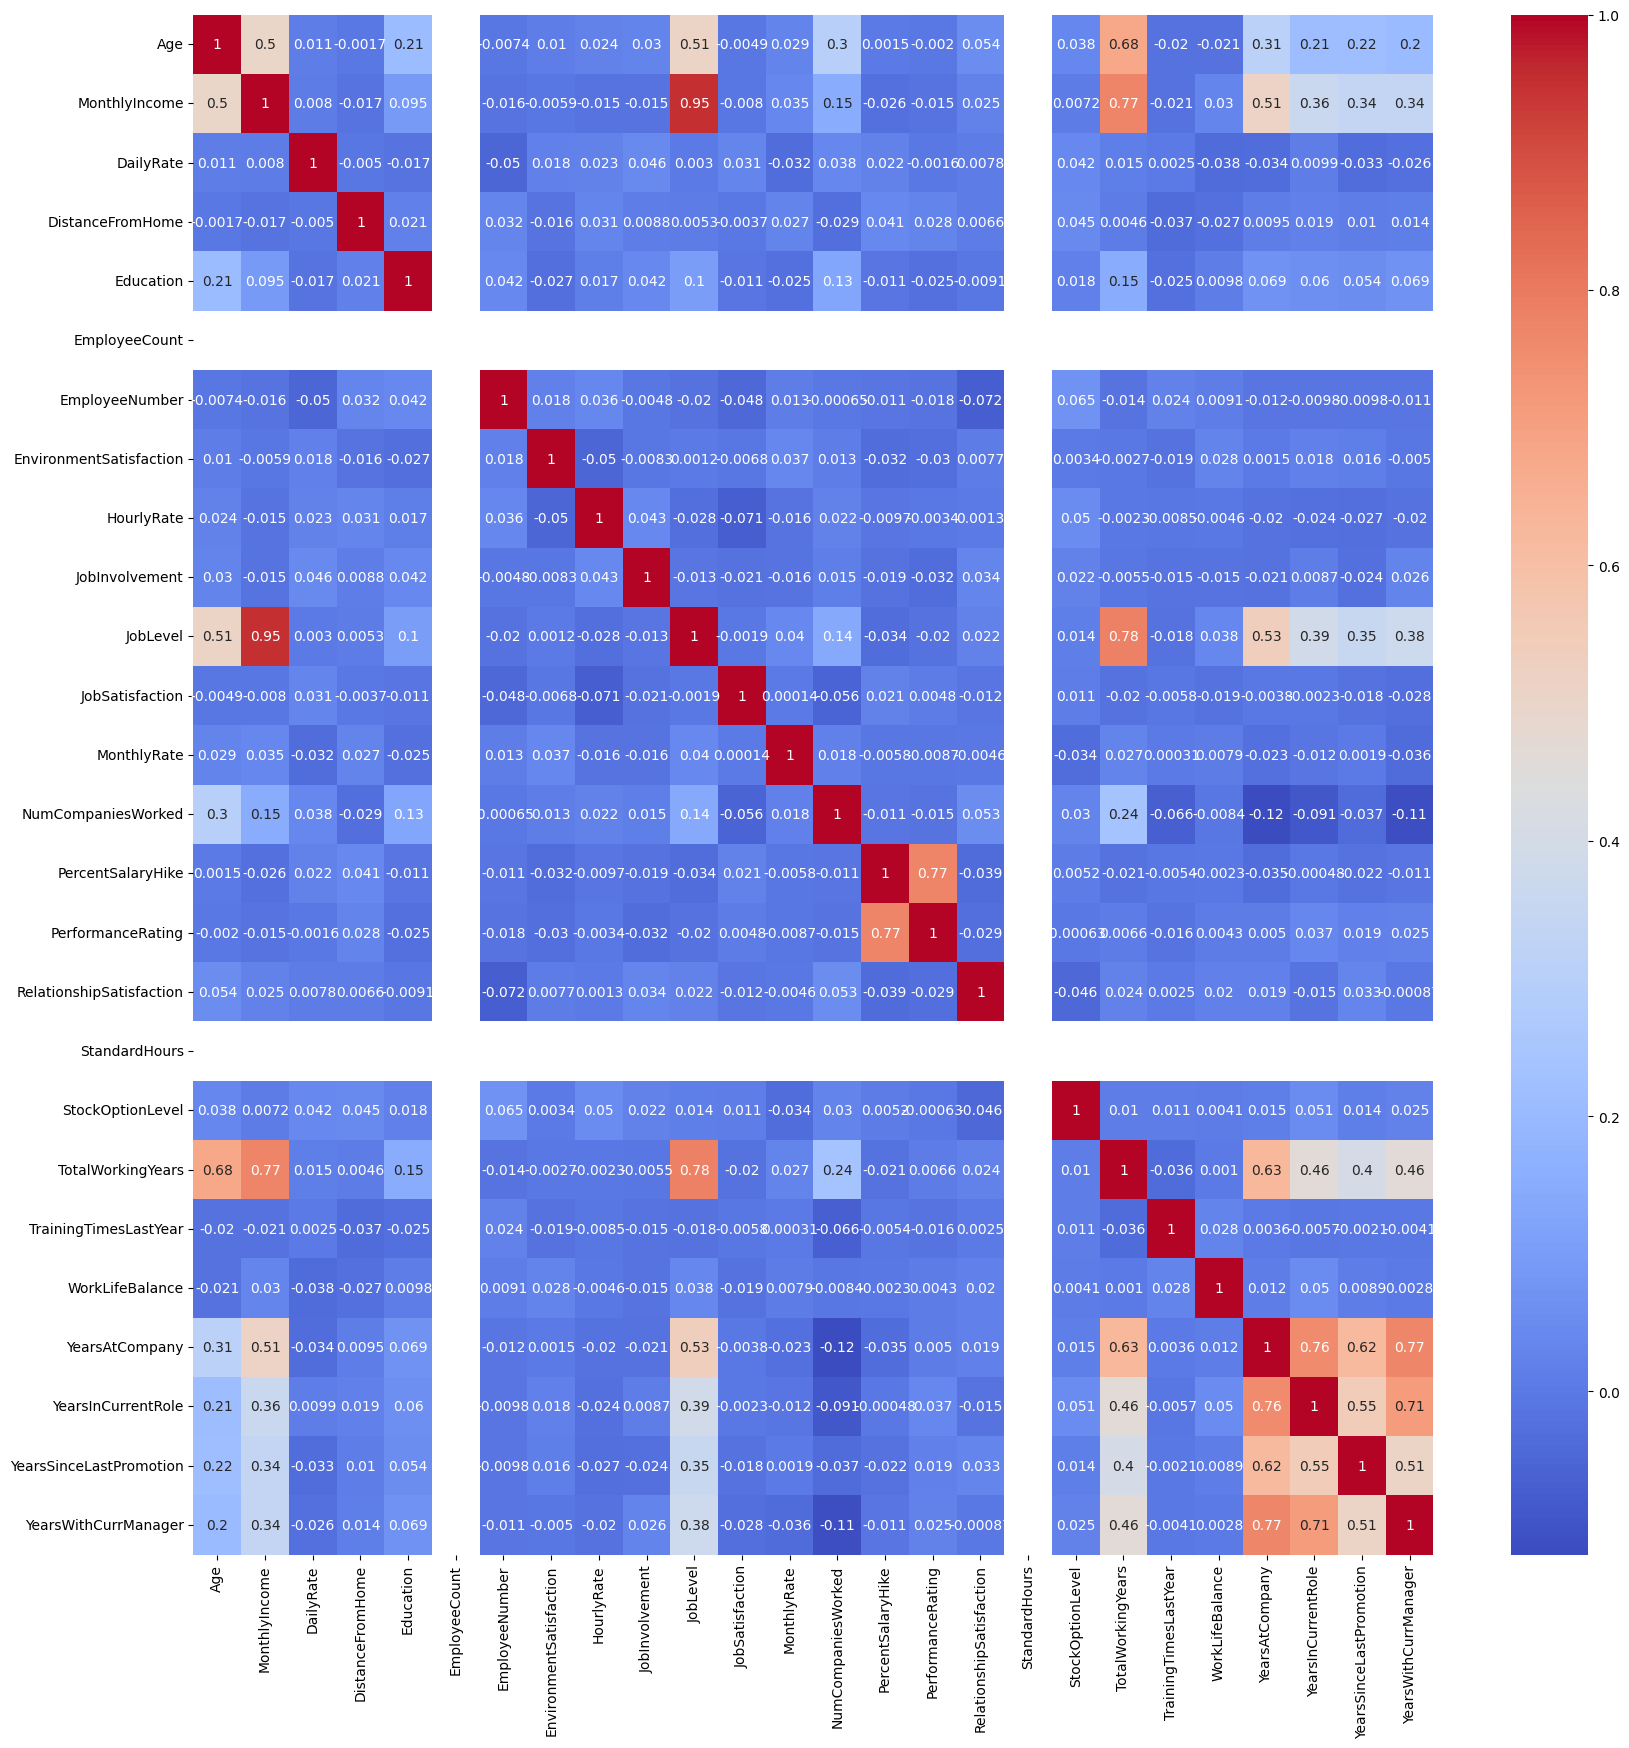

In [ ]:
#This calculates the Pearson correlation coefficient between each pair of features in the dataframe.
#The result is a correlation matrix that shows how closely related each feature is to every other feature.
# Job level is strongly correlated with total working hours
# Monthly income is strongly correlated with Job level
# Monthly income is strongly correlated with total working hours
# Age is strongly correlated with monthly income

import seaborn as sns
correlations = hr_df.corr(numeric_only=True)
plt.figure(figsize=(20, 20))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.show()

#sns.heatmap(correlations, annot = True)

This uses the heatmap() function from the seaborn library to create a heatmap of the correlation matrix. The annot=True parameter shows the correlation coefficients on the heatmap.
The resulting heatmap shows which pairs of features are strongly correlated (either positively or negatively) with each other. For example, if the JobLevel and TotalWorkingYears cells are colored red, it means that there is a strong positive correlation between these features, i.e., employees with higher job levels tend to have more total working years.
The code creates a heatmap using the seaborn library to display the correlation between different numerical features of the hr_df dataframe. The correlations are calculated using the corr() method.
The heatmap displays a color-coded matrix, where each cell represents the correlation between two features. The scale on the right side of the heatmap shows the strength of the correlation, ranging from -1 to 1, with darker colors representing stronger correlations.

The annotations in the heatmap indicate the correlation coefficients between different pairs of features. The annotations show that job level is strongly correlated with total working hours, monthly income is strongly correlated with job level and total working hours, and age is strongly correlated with monthly income.

These findings can provide valuable insights for HR departments and managers, such as the importance of job level and total working hours in determining employee performance and compensation. Additionally, the correlation between age and monthly income suggests that older employees may earn more than younger employees with similar qualifications and experience.

**PRACTICE OPPORTUNITY [OPTIONAL]:**
- **Change the color of the heatmap [External Research is Required]**

# **FINAL CAPSTONE PROJECT: CREDIT CARD TRANSACTION ANALYSIS**

In [ ]:
#Import the required libraries, load the dataset and print the data.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Load the dataset
credit_df = pd.read_csv("creditcard.csv")
credit_df


,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,258647,1.725265,-1.337256,-1.012687,-0.361656,-1.431611,-1.098681,-0.842274,-0.026594,-0.032409,...,0.414524,0.793434,0.028887,0.419421,-0.367529,-0.155634,-0.015768,0.010790,189.00,0
1,69263,0.683254,-1.681875,0.533349,-0.326064,-1.455603,0.101832,-0.520590,0.114036,-0.601760,...,0.116898,-0.304605,-0.125547,0.244848,0.069163,-0.460712,-0.017068,0.063542,315.17,0
2,96552,1.067973,-0.656667,1.029738,0.253899,-1.172715,0.073232,-0.745771,0.249803,1.383057,...,-0.189315,-0.426743,0.079539,0.129692,0.002778,0.970498,-0.035056,0.017313,59.98,0
3,281898,0.119513,0.729275,-1.678879,-1.551408,3.128914,3.210632,0.356276,0.920374,-0.160589,...,-0.335825,-0.906171,0.108350,0.593062,-0.424303,0.164201,0.245881,0.071029,0.89,0
4,86917,1.271253,0.275694,0.159568,1.003096,-0.128535,-0.608730,0.088777,-0.145336,0.156047,...,0.031958,0.123503,-0.174528,-0.147535,0.735909,-0.262270,0.015577,0.015955,6.53,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5045,223366,1.118331,2.074439,-3.837518,5.448060,0.071816,-1.020509,-1.808574,0.521744,-2.032638,...,0.289861,-0.172718,-0.021910,-0.376560,0.192817,0.114107,0.500996,0.259533,1.00,1
5046,239499,-2.150855,2.187917,-3.430516,0.119476,-0.173210,0.290700,-2.808988,-2.679351,-0.556685,...,-0.073205,0.561496,-0.075034,-0.437619,0.353841,-0.521339,0.144465,0.026588,50.00,1
5047,125342,-7.139060,2.773082,-6.757845,4.446456,-5.464428,-1.713401,-6.485365,3.409395,-3.053493,...,1.303250,-0.016118,-0.876670,0.382230,-1.054624,-0.614606,-0.766848,0.409424,106.90,1
5048,220725,-1.169203,1.863414,-2.515135,5.463681,-0.297971,1.364918,0.759219,-0.118861,-2.293921,...,-0.393090,-0.708692,0.471309,-0.078616,-0.544655,0.014777,-0.240930,-0.781055,324.59,1


In [ ]:
#Explore the features available in the DataFrame

print(credit_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5050 non-null   int64  
 1   V1          5050 non-null   float64
 2   V2          5050 non-null   float64
 3   V3          5050 non-null   float64
 4   V4          5050 non-null   float64
 5   V5          5050 non-null   float64
 6   V6          5050 non-null   float64
 7   V7          5050 non-null   float64
 8   V8          5050 non-null   float64
 9   V9          5050 non-null   float64
 10  V10         5050 non-null   float64
 11  V11         5050 non-null   float64
 12  V12         5050 non-null   float64
 13  V13         5050 non-null   float64
 14  V14         5050 non-null   float64
 15  V15         5050 non-null   float64
 16  V16         5050 non-null   float64
 17  V17         5050 non-null   float64
 18  V18         5050 non-null   float64
 19  V19         5050 non-null  

In [ ]:
#Apply preprocessing techniques: Checking and handling missing values: Drops rows with missing values in the target variable 'Class'.
#We don't want to impute the target variable as it might introduce bias. Fills missing values in the features with their mean.
#This is a simple imputation strategy to ensure that the dataset doesn't have any NaN values.

# Check for missing values in the dataset
print(credit_df.isnull().sum())

# Drop rows with missing values in the target variable 'Class'
credit_df.dropna(subset=['Class'], inplace=True)

# For simplicity, you can fill missing values in the features with the mean (or any other strategy you prefer)
credit_df.fillna(credit_df.mean(), inplace=True)


Unnamed: 0    0
V1            0
V2            0
V3            0
V4            0
V5            0
V6            0
V7            0
V8            0
V9            0
V10           0
V11           0
V12           0
V13           0
V14           0
V15           0
V16           0
V17           0
V18           0
V19           0
V20           0
V21           0
V22           0
V23           0
V24           0
V25           0
V26           0
V27           0
V28           0
Amount        0
Class         0
dtype: int64


# **Checking the fraud to non-fraud ratio**

Analyzing the Proportion of Fraudulent Transactions
In this section, you will be examining a dataset named creditcard.csv, which comprises data related to credit card transactions. Fortunately, instances of fraud are exceedingly rare in this collection of transactions.

Nonetheless, Machine Learning models typically perform optimally when the dataset encompasses a roughly equal distribution of the various classes. If instances of fraud are scarce, the model has limited data to learn how to recognize such cases. This situation is referred to as class imbalance and poses a significant challenge in fraud detection.

Let's dive into this dataset and take a closer look at the issue of class imbalance.

**Steps**

- Import the pandas library as pd and load the credit card data into a DataFrame df. This step has been completed for you.

- Utilize .info() to display details about df.

- Employ .value_counts() to obtain the counts of fraudulent and non-fraudulent transactions in the 'Class' column, and store the result in a variable named occ.

- Calculate the proportion of fraudulent transactions relative to the total number of transactions in the dataset.

In [26]:
# Count the occurrences of fraud and no fraud and print them, then calculate the ratio of fraudulent to non-fraudulent transactions.

occ = credit_df['Class'].value_counts()
print(occ)
fraud_ratio = occ[1] / len(credit_df.index)
print(f"Fraudulent transaction ratio: {fraud_ratio:.6f}")

# Let’s check the transaction distribution.
Total_transactions = len(credit_df)
normal = len(credit_df[credit_df['Class'] == 0])
fraudulent = len(credit_df[credit_df['Class'] == 1])
fraud_percentage = round(fraudulent/normal*100, 2)
print('Total number of Transactions are {}'.format(Total_transactions))
print('Number of Normal Transactions are {}'.format(normal))
print('Number of Fraudulent Transactions are {}'.format(fraudulent))
print('Percentage of Fraud Transactions is {}'.format(fraud_percentage))

# Assuming y is the 'Class' column from credit_df
y = credit_df['Class']

# Count the total number of observations from the length of y
total_obs = len(y)

# Count the total number of non-fraudulent observations
count_non_fraud = y.value_counts()[0]

# Calculate the percentage of non-fraud observations in the dataset
percentage = (float(count_non_fraud) / float(total_obs)) * 100

# Print the percentage: this is our "natural accuracy" by doing nothing
print(f"Percentage of Non-Fraud Transactions: {percentage:.2f}%")


0    5000
1      50
Name: Class, dtype: int64
Fraudulent transaction ratio: 0.009901
Total number of Transactions are 5050
Number of Normal Transactions are 5000
Number of Fraudulent Transactions are 50
Percentage of Fraud Transactions is 1.0
Percentage of Non-Fraud Transactions: 99.01%


The last line calculates the ratio of fraud and non-fraud cases by dividing the respective counts by the total number of transactions in the dataset (length of df's index). It then prints both ratios (fraudulent and non-fraudulent transactions) as a pandas Series.
The output shows that you have successfully loaded the credit card transaction dataset and Analysed it. ***Here's a brief explanation of the output:***

**Fraud and no fraud occurrences:**
There are 5,000 non-fraudulent transactions (Class 0) and 50 fraudulent transactions (Class 1) in the dataset.

**Fraud ratio:**
The fraudulent transaction ratio is 0.01 (1%), whereas the non-fraudulent transaction ratio is 0.99 (99%). This result implies that the dataset has a severe class imbalance, as fraudulent transactions constitute a small minority. To balance the classes and improve the model's effectiveness in identifying fraud, you may need to use strategies such as oversampling, undersampling, or using synthetic data (like SMOTE) while training a machine learning model on this dataset.


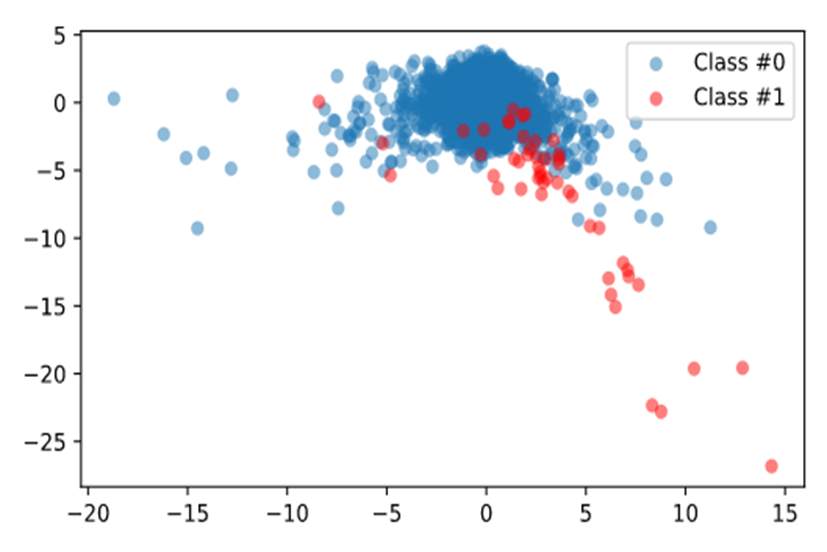

# **Normalizing and Preparing Data for Fraud Detection Analysis**

In this task, you will be normalizing the 'Amount' feature in a dataset containing credit card transactions and preparing the data for further analysis. The goal is to ensure that all features are on the same scale, which can enhance the performance of certain algorithms, and to split the data into features and labels for modeling.

**Steps**

1. Normalize the 'Amount' Feature: Utilize StandardScaler to normalize the 'Amount' feature in the dataset credit_df.
The normalization ensures that the 'Amount' feature has a mean of 0 and a standard deviation of 1.

2. Define a Data Preparation Function: Create a function prep_data that takes a DataFrame df as input and separates it into features (X) and labels (y).
The function should drop the 'Class' column for features (X) and use the 'Class' column as labels (y).

3. Split Data into Features and Labels: Use the prep_data function to split the credit_df DataFrame into features (X) and labels (y).

4. Check Class Distribution: Print the distribution of the original labels (y) to understand the class imbalance in the dataset.

In [ ]:
# Normalize the 'Amount' feature
scaler = StandardScaler()
credit_df['Amount'] = scaler.fit_transform(credit_df['Amount'].values.reshape(-1, 1))

#Feature Normalization: Normalizes the 'Amount' feature to have a mean of 0 and a standard deviation of 1.
#This ensures that all features are on the same scale, which can improve the performance of certain algorithms.

In [ ]:
# Define a function to prepare the data

def prep_data(df):
    X = df.drop('Class', axis=1).values
    y = df['Class'].values
    return X, y

#Data Preparation Function: This function splits the DataFrame into features (X) and labels (y) for modeling.

In [ ]:
# Use the prep_data function to prepare the data
X, y = prep_data(credit_df)

#Splitting Data into Features and Labels: Uses the prep_data function to split the data into features (X) and labels (y).

In [ ]:
# Print the value counts for the original labels
print(pd.Series(y).value_counts())

#Checking Class Distribution: Prints the distribution of the original labels to understand the class imbalance.

0    5000
1      50
dtype: int64


# **Balancing Class Distribution in Credit Card Transactions Using SMOTE**


Address the class imbalance in the credit card transactions dataset by using the Synthetic Minority Over-sampling Technique (SMOTE) to create a balanced dataset.

**Steps:**

1. Initialize SMOTE: Initialize the SMOTE method to be used for resampling.
2. Resample the Data: Apply the SMOTE method to create a balanced dataset by oversampling the minority class.
3. Verify Resampling:
Print the value counts for the resampled labels to ensure that the class distribution is now balanced.
4. Adjust Parameters (Optional): Optionally, adjust the parameters of the SMOTE method, such as k_neighbors, to fine-tune the resampling process.

In [ ]:
# Define the resampling method
method = SMOTE()

# Create the resampled feature set
X_resampled, y_resampled = method.fit_resample(X, y)

# Print the value counts for the resampled labels
print(pd.Series(y_resampled).value_counts())

# Define the resampling method with adjusted k_neighbors
#method = SMOTE(k_neighbors=2)  # or you can use 1 if you prefer

#Handling Class Imbalance using SMOTE: Uses the SMOTE method to oversample the minority class and create a balanced dataset.

0    5000
1    5000
dtype: int64


The choice of k_neighbors can influence the quality of the synthetic samples. Using a smaller value (like 1 or 2) might make the synthetic samples more closely resemble actual data points, but it might also make them less diverse. On the other hand, using a larger value might produce more diverse synthetic samples, but they might be less representative of the actual minority class data points. It's often a good idea to experiment with different values of k_neighbors to find the best balance for a given dataset.

# **First Option: Default Setting**
When the k_neighbors parameter is not specified, it defaults to a value of 5 in the SMOTE function. This means that the algorithm will use the

# **Visualizing the Balanced Dataset After Applying SMOTE**

Visualize the distribution of the credit card transactions data after addressing class imbalance using SMOTE, and display the counts of fraudulent and non-fraudulent transactions in the resampled dataset.

**Steps:**

1. Import Necessary Libraries: Import the required libraries for plotting, such as matplotlib.
2. Plot the Resampled Data: Use the plot_data function to visualize the distribution of the resampled data, highlighting the fraudulent and non-fraudulent transactions.
3. Display Class Counts: Print the counts of fraudulent and non-fraudulent transactions in the resampled dataset to confirm that the class imbalance has been addressed.

In [ ]:
import matplotlib.pyplot as plt

# Plot the resampled data
plot_data(X_resampled, y_resampled)

# Print the value counts for the resampled labels
print(pd.Series(y_resampled).value_counts())

#Assuming the plot_data function has been defined previously

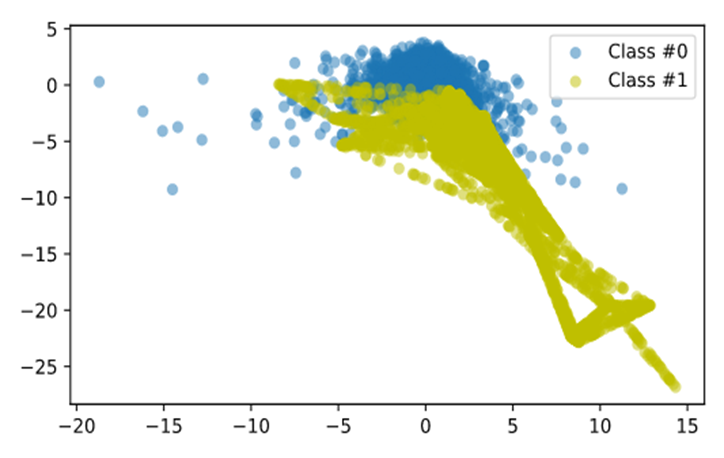

In this code, we visualize the effects of applying the Synthetic Minority Over-sampling Technique (SMOTE) to balance the dataset. After using SMOTE to address the class imbalance by generating synthetic samples, it's important to visually inspect and confirm the changes in the data distribution.

The code snippet begins by plotting the resampled data, allowing us to visually compare the distribution of fraudulent and non-fraudulent transactions before and after applying SMOTE. Additionally, the code prints the counts of both classes in the resampled dataset, providing a numerical confirmation that the class imbalance has been addressed.

# **Visualizing the Effects of Data Resampling**

The task is to create a visual comparison between the original imbalanced dataset and the resampled dataset obtained after applying the Synthetic Minority Over-sampling Technique (SMOTE). This comparison will help in understanding how SMOTE has altered the distribution of the minority class and will provide a visual confirmation of the class balancing.

**Steps:**

Define the Comparison Function:

- Define a function compare_plot that takes as input the original features X_original, original labels y_original, resampled features X_resampled, resampled labels y_resampled, and the resampling method used.

- The function creates two scatter plots side by side. The first plot shows the original data, and the second plot shows the resampled data. Both plots display the distribution of the two classes.

Plot Original vs. Resampled Data:

- Call the compare_plot function, passing in the original and resampled datasets along with the resampling method used ('SMOTE').

- This will generate side-by-side scatter plots comparing the distribution of classes before and after resampling.

Display Class Counts:

- Print the value counts for the resampled labels y_resampled to display the number of instances in each class after resampling. This provides a numerical confirmation of the class balancing.

In [ ]:
def compare_plot(X_original, y_original, X_resampled, y_resampled, method):
    # Start a plot figure
    plt.figure(figsize=(10, 5))

    # Subplot 1: Original data
    plt.subplot(1, 2, 1)
    plt.scatter(X_original[y_original == 0, 0], X_original[y_original == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X_original[y_original == 1, 0], X_original[y_original == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.title('Original Data')
    plt.legend()

    # Subplot 2: Resampled data
    plt.subplot(1, 2, 2)
    plt.scatter(X_resampled[y_resampled == 0, 0], X_resampled[y_resampled == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X_resampled[y_resampled == 1, 0], X_resampled[y_resampled == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.title(f'Resampled Data ({method})')
    plt.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

# Call the compare_plot function
compare_plot(X, y, X_resampled, y_resampled, method='SMOTE')

# Print the value counts for the resampled labels
print(pd.Series(y_resampled).value_counts())


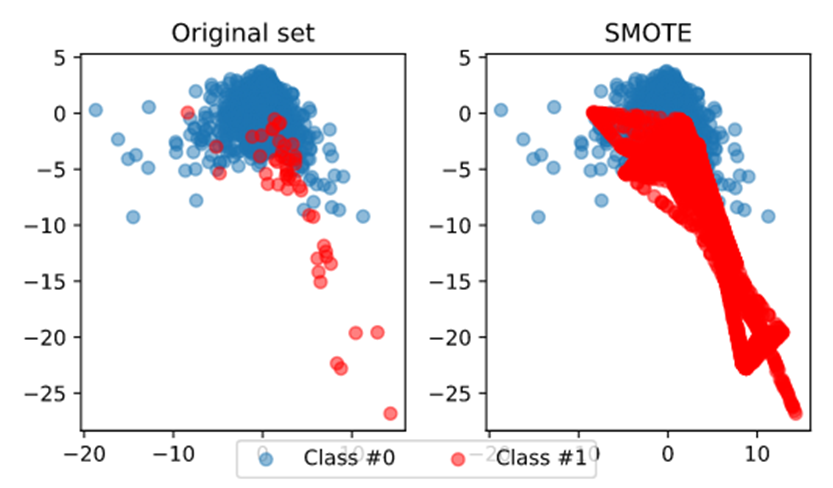

# **Using ML classification to catch fraud**

**Evaluating the Performance of a Random Forest Classifier on Credit Card Transaction Data**


The task is to train a Random Forest Classifier on a dataset containing credit card transactions and evaluate its performance in terms of classification metrics, AUC-ROC score, and a confusion matrix. The goal is to assess how well the model can predict fraudulent transactions.

**Steps:**

1. Data Splitting: Use train_test_split to split the dataset (X, y) into training (X_train, y_train) and testing (X_test, y_test) sets. The test size is set to 20% of the total data.

2. Model Training: Initialize a RandomForestClassifier with a fixed random state for reproducibility.
Fit the classifier to the training data (X_train, y_train).

3. Model Prediction: Use the trained Random Forest model to predict the labels for the testing data (X_test). Store the predictions in y_pred_rf.

4. Performance Evaluation: Print the classification report for the Random Forest model, which includes precision, recall, and F1-score for each class.
Calculate and print the AUC-ROC score for the model.

5. Confusion Matrix Calculation: Compute and print the confusion matrix for the Random Forest model to understand the number of true positives, true negatives, false positives, and false negatives.

6. Visualizing Confusion Matrix: Use Seaborn's heatmap function to visualize the confusion matrix. This provides a color-coded representation of the matrix, making it easier to interpret the results.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a RandomForestClassifier model to our data
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

#Train a Random Forest classifier

RandomForestClassifier(random_state=42)

--- RandomForestClassifier ---
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1001
           1       1.00      0.89      0.94         9

    accuracy                           1.00      1010
   macro avg       1.00      0.94      0.97      1010
weighted avg       1.00      1.00      1.00      1010

AUC-ROC: 0.94

Confusion Matrix:
 [[1001    0]
 [   1    8]]


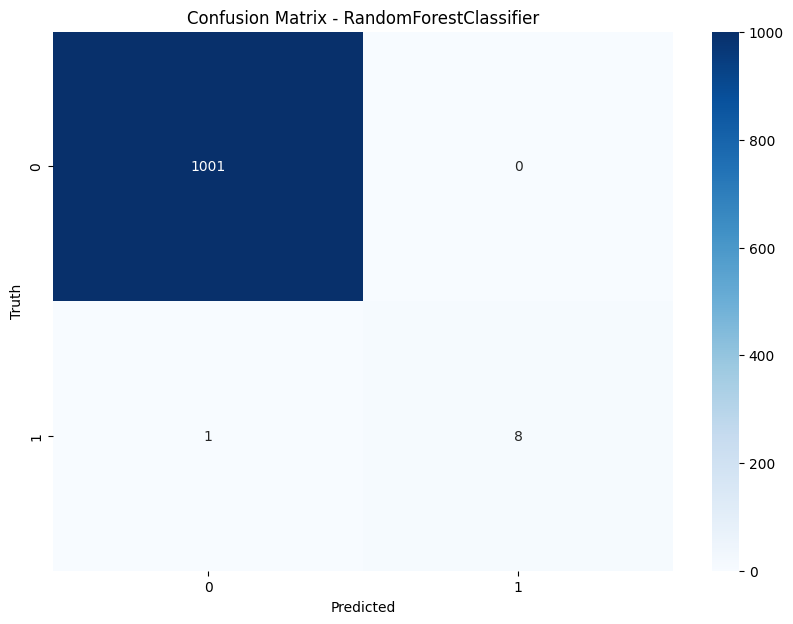

In [36]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Obtain RandomForestClassifier predictions
y_pred_rf = rf_clf.predict(X_test)

# Print the RandomForestClassifier classification report and AUC-ROC score
print('--- RandomForestClassifier ---')
print('Classification Report:')
print(classification_report(y_test, y_pred_rf))
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
print(f"AUC-ROC: {roc_auc_rf:.2f}")

# Compute and print the confusion matrix for RandomForestClassifier
conf_mat_rf = confusion_matrix(y_test, y_pred_rf)
print('\nConfusion Matrix:\n', conf_mat_rf)

# Display the confusion matrix for RandomForestClassifier as a Seaborn heatmap
plt.figure(figsize=(10,7))
sns.heatmap(conf_mat_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix - RandomForestClassifier')
plt.show()


**Classification Report:**

- **Precision:** The precision for both classes (0 and 1) is 1.00, which means that all instances predicted as either class were indeed of that class.

- **Recall:** The recall for class 0 is 1.00, but it's 0.89 for class 1. This means that the model identified all instances of class 0 correctly, but missed 11% (1 out of 9) of class 1 instances.

- **F1-Score:** The F1-score is the harmonic mean of precision and recall. For class 0, it's 1.00, and for class 1, it's 0.94. An F1-score closer to 1 indicates better performance.

- **Support:** This indicates the number of actual occurrences of the class in the test data set. There are 1001 instances of class 0 and 9 instances of class 1.
Accuracy: The overall accuracy of the model is 1.00, indicating that the model made very few mistakes.

- **Macro Avg:** The average precision, recall, and F1-score between the two classes, without considering the imbalance of the classes.

- **Weighted Avg:** The average precision, recall, and F1-score between the two classes, considering the imbalance of the classes.

- **AUC-ROC:** The Area Under the Receiver Operating Characteristic curve is 0.94. This score is close to 1, indicating that the model has a good measure of separability and is able to distinguish between the two classes effectively.



**Confusion Matrix:**

The confusion matrix shows the following results:
- **True Negative (TN):** 1001 instances of class 0 were correctly predicted as class 0.

- **False Positive (FP):** 0 instances of class 0 were incorrectly predicted as class 1.

- **False Negative (FN):** 1 instance of class 1 was incorrectly predicted as class 0.

- **True Positive (TP):** 8 instances of class 1 were correctly predicted as class 1.

Overall, the RandomForestClassifier has performed exceptionally well, especially considering the class imbalance. However, there is still room for improvement in identifying class 1 instances, as indicated by the recall for class 1.

**Evaluating the Performance of a Logistic Regression Model with SMOTE on Imbalanced Credit Card Transaction Data**


The task is to build a pipeline that combines the Synthetic Minority Over-sampling Technique (SMOTE) with a Logistic Regression model to address class imbalance in a credit card transactions dataset. The performance of the model is then evaluated using classification metrics and a confusion matrix.

**Steps:**

1. Pipeline Definition: Define a pipeline that first applies SMOTE for resampling and then fits a Logistic Regression model. This ensures that the data is resampled before being fed into the model for training.

2. Model Training: Fit the pipeline to the training data (X_train, y_train). The pipeline will first apply SMOTE to balance the classes and then train the Logistic Regression model on the resampled data.

3. Model Prediction: Use the trained pipeline to predict the labels for the testing data (X_test). Store the predictions in predicted_lr.

4. Performance Evaluation: Print the classification report for the Logistic Regression model, which includes precision, recall, and F1-score for each class.

5. Confusion Matrix Calculation: Compute and print the confusion matrix for the Logistic Regression model to understand the number of true positives, true negatives, false positives, and false negatives.

6. Visualizing Confusion Matrix: Use Seaborn's heatmap function to visualize the confusion matrix. This provides a color-coded representation of the matrix, making it easier to interpret the results.

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define a pipeline to combine SMOTE and Logistic Regression
resampling = SMOTE(random_state=42)
model = LogisticRegression()

# Define a pipeline to combine SMOTE and Logistic Regression
pipeline = Pipeline([('SMOTE', SMOTE(random_state=42)), ('Logistic Regression', LogisticRegression())])
pipeline.fit(X_train, y_train)
predicted_lr = pipeline.predict(X_test)

#Define a pipeline to combine SMOTE and Logistic Regression


LogisticRegression:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1001
           1       0.38      1.00      0.55         9

    accuracy                           0.99      1010
   macro avg       0.69      0.99      0.77      1010
weighted avg       0.99      0.99      0.99      1010

Confusion matrix:
 [[986  15]
 [  0   9]]


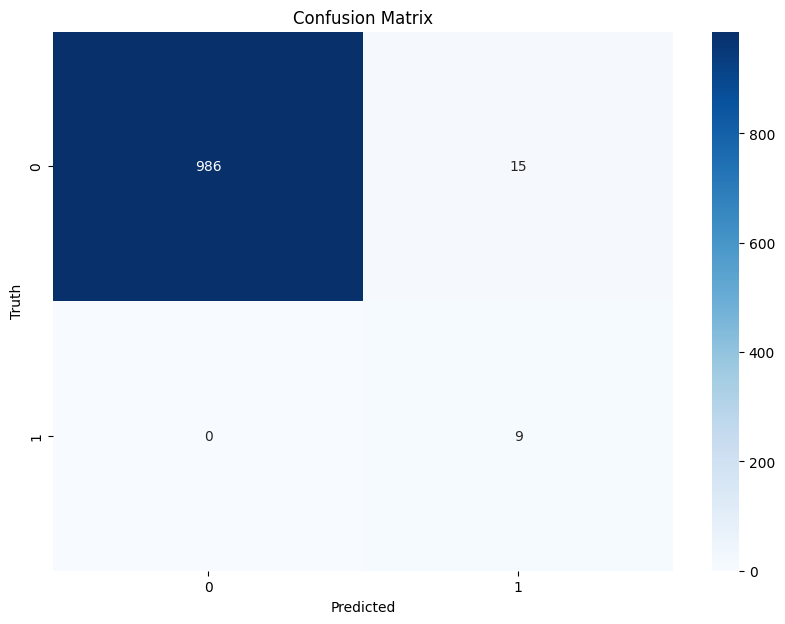

In [31]:
# Print the LogisticRegression classification report and confusion matrix
print('\nLogisticRegression:')
print(classification_report(y_test, predicted_lr))
conf_mat_lr = confusion_matrix(y_true=y_test, y_pred=predicted_lr)
print('Confusion matrix:\n', conf_mat_lr)

# Display the confusion matrix as a Seaborn heatmap
plt.figure(figsize=(10,7))
sns.heatmap(conf_mat_lr, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

# **PRACTICE OPPORTUNITIES SOLUTIONS**

**PRACTICE OPPORTUNITY SOLUTION:**

Calculate the median monthly rate. Use the calculated median values to fill out missing data. Confirm that the process is successful

In [ ]:
# Let's read a CSV file using Pandas as follows
employee_df = pd.read_csv('Human_Resources.csv')
employee_df

In [ ]:
# first, let's locate rows that have Null values
employee_df.isnull().sum()

In [ ]:
# Calculate the average monthly income
employee_df['MonthlyRate'].median()

In [ ]:
# You can use Fillna to fill a given column with a certain value
employee_df['MonthlyRate'].fillna(employee_df['MonthlyRate'].median(), inplace = True)


In [ ]:
employee_df

In [ ]:
# first, let's locate rows that have Null values
employee_df.isnull().sum()

**PRACTICE OPPORTUNITY SOLUTION:**

- Import the Human Resources data and remove all missing values
- How many unique categories exist in the Education Field column?
- Perform one hot encoding to the Education Field column

In [ ]:
# Let's read a CSV file using Pandas as follows
hr_df = pd.read_csv('Human_Resources.csv')
hr_df.dropna(how = 'any', inplace = True)


In [ ]:
hr_df['EducationField'].unique()

In [ ]:
EducationField_Encoded = pd.get_dummies(hr_df['EducationField'])
print(EducationField_Encoded)

**PRACTICE OPPORTUNITY SOLUTION:**

- Perform feature scaling by performing standardization (Recall that Standardization is conducted to transform the data to have a mean of zero and standard deviation of 1.
- Perform a sanity check to ensure that the transformation was successful

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
hr_df['Age'] = scaler.fit_transform(hr_df['Age'].values.reshape(-1,1))

In [ ]:
hr_df.describe().round(2)

**PRACTICE OPPORTUNITY SOLUTION:**

- Filter the hr_df to only include the employees who stayed in the company
- Generate statistical summary for employees who stayed
- Compare both statistical summaries. What do you infer from the data?

In [ ]:
stayed_df = hr_df[hr_df['Attrition'] == 'No']


In [ ]:
# View employees who stayed
stayed_df

In [ ]:
stayed_df.describe()

In [ ]:
# Let's compare the mean and std of the employees who stayed and left
# 'age': mean age of the employees who stayed is higher compared to who left
# 'DailyRate': Rate of employees who stayed is higher
# 'DistanceFromHome': Employees who stayed live closer to home
# 'EnvironmentSatisfaction' & 'JobSatisfaction': Employees who stayed are generally more satisifed with their jobs
# 'StockOptionLevel': Employees who stayed tend to have higher stock option level

**PRACTICE OPPORTUNITY SOLUTION:**
- **Change the color of the heatmap [External Research is Required]**

In [ ]:
import numpy as np
correlations = hr_df.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, cmap="YlGnBu", annot = True);